# Land cover unsupervised classification using Sentinel-2
---

The file contains methods for:
 1. loading and displaying Sentinel-2 image
 2. data transformation for unsupervised classification
 3. performing unsupervised clustering using k-means
 4. assigning clusters to LC classes
 5. loading and displaying localisations of validation points
 6. assesing classification performance using validation points
 
 ---
 
 <i>The file written and tested using Jupyter Notebook ver. 6.1.4 (core ver. 4.6.3) on Anaconda ver. 4.9.2 in Windows OS </i>
 
 <i>Author: Artur Nowakowski, Warsaw University of Technology, contact: artur.nowakowski@wfp.org </i>

## Configuration

In [1]:
# folder containing S-2 data
imFolder = r'C:\Artur\imperativespace\S2_data'

# folder for storing results
resFolder = r'C:\Artur\imperativespace\visualisations'

# validation data file
valPoints = r'C:\Artur\imperativespace\validation_data\validation_points.txt'


## 1. Loading and displaying Sentinel-2 image

In [2]:
# loading Sentinel-2 (S2) image
#
# we assume that each band is saved in a separated tif file, all bands are resampled to 10x10 m resolution

from skimage import io

# loading S2 bands from a folder
coll = io.ImageCollection(imFolder + '\*.tif')

# a list of loaded files
print(coll.files)

band_names=['B1','B2','B3','B4','B5','B6','B7','B8','B8A','B9','B10','B11','B12']


['C:\\Artur\\imperativespace\\S2_data\\B1.tif', 'C:\\Artur\\imperativespace\\S2_data\\B2.tif', 'C:\\Artur\\imperativespace\\S2_data\\B3.tif', 'C:\\Artur\\imperativespace\\S2_data\\B4.tif', 'C:\\Artur\\imperativespace\\S2_data\\B5.tif', 'C:\\Artur\\imperativespace\\S2_data\\B6.tif', 'C:\\Artur\\imperativespace\\S2_data\\B7.tif', 'C:\\Artur\\imperativespace\\S2_data\\B8.tif', 'C:\\Artur\\imperativespace\\S2_data\\B8a.tif', 'C:\\Artur\\imperativespace\\S2_data\\B9.tif', 'C:\\Artur\\imperativespace\\S2_data\\B10.tif', 'C:\\Artur\\imperativespace\\S2_data\\B11.tif', 'C:\\Artur\\imperativespace\\S2_data\\B12.tif']


In [3]:
# displaying image
import numpy as np
from skimage import exposure

# function for creating a color composition including histogram stretching
def composition(band1,band2,band3):
    im_comp=np.dstack([band1/band1.max(), band2/band2.max(), band3/band3.max()])
    for i in range(3):
        v_min, v_max = np.percentile(im_comp[:,:,i],(1,98))
        im_comp[:,:,i] = exposure.rescale_intensity(im_comp[:,:,i],in_range=(v_min,v_max))
    return im_comp

Bands in Sentinel-2

| No. | Name |
| :--- | :--- |
| 1 |  Coastal aerosol |
| 2 |  Blue |
| 3 |  Green |
| 4 |  Red |
| 5 |  Red Edge 1 |
| 6 |  Red Edge 2 |
| 7 |  Red Edge 3 |
| 8 |  NIR |
| 8A |  NIR narrow |
| 9 |  Water vapor |
| 10 |  SWIR - cirrus |
| 11 |  SWIR 1 |
| 12 |  SWIR 2 |

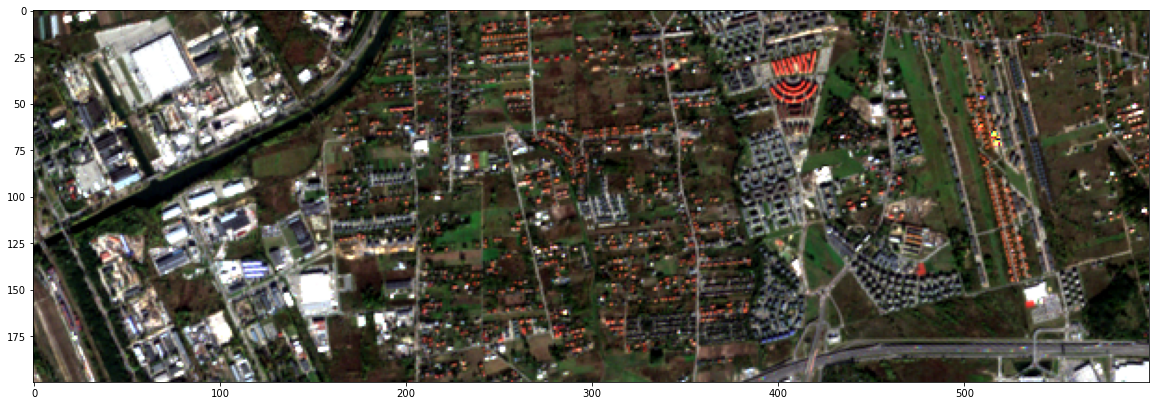

In [7]:
# calling 'composition' function for red, green and blue bands (bands no. 4, 3, and 2 in Sentinel-2)
import matplotlib.pyplot as plt

im_comp = composition(coll[3],coll[2],coll[1])
plt.figure(figsize=(20,10))
plt.imshow(im_comp)

## 2. Data transformation for unsupervised classification

Data transformation aims at preparing a data table required as an input by the classification algorithms in Python. For each pixel its values in bands are read from the S2 image and stored in a separated row of the table.
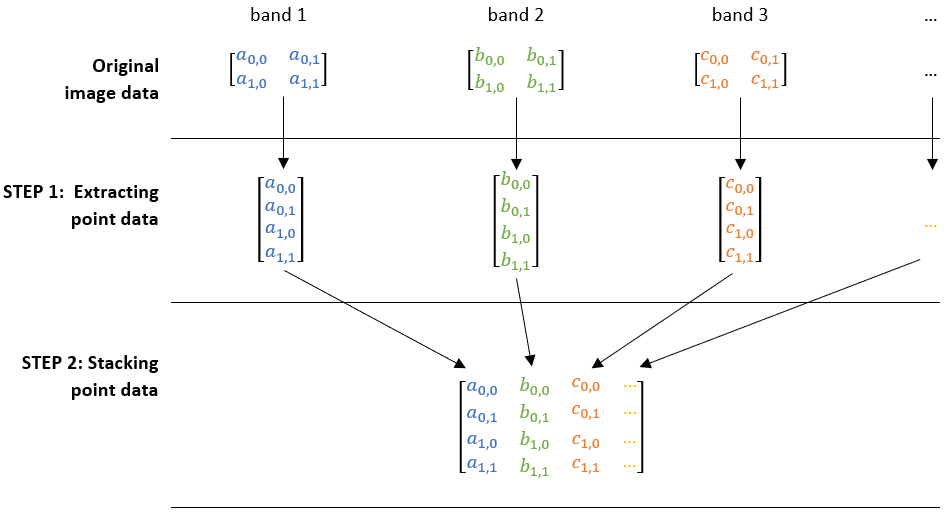

In [8]:
# step 1 - reading band values for training pixels
bands=[]
for i in range(len(coll)):
    band = np.asarray(coll[i].data).flatten()
    bands.append(band)
    
# step 2 - stacking band vectors into a table    
X=np.stack(bands).T


## 3. Clustering using k-means


In [29]:
# k-means
#
# used parameters:
# n_clusters - number of clusters (to obtain better results we select the number of clusters much greater than the number of desired LC classes)
# random_state - the initial state for randomly generated numbers
# algorithm - type of k-means algorithm

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=2, algorithm="full")

Y=kmeans.fit_predict(X)

Text(0.5, 1.0, 'cluster 9')

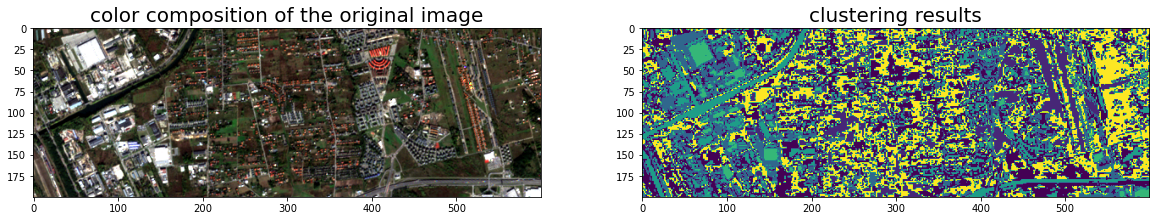

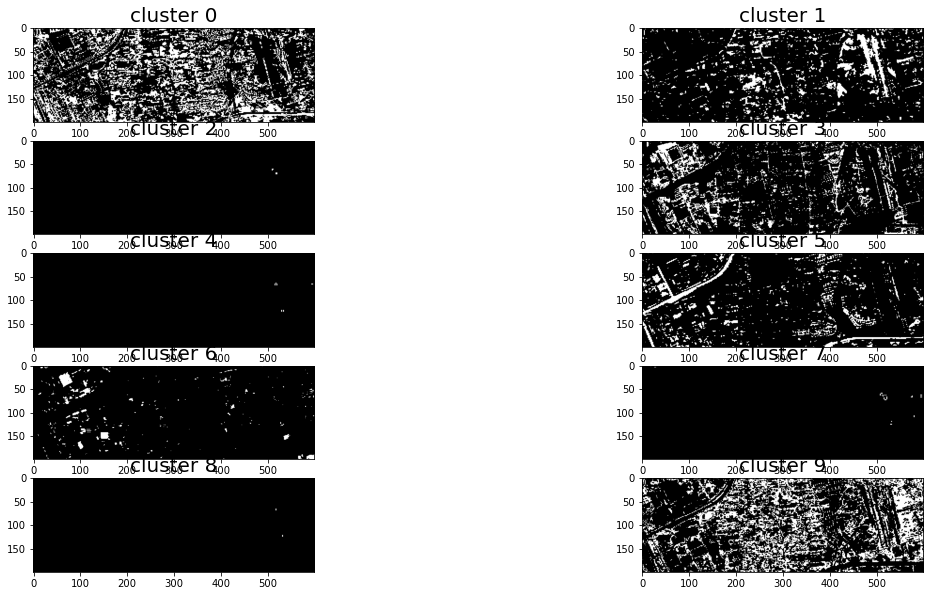

In [31]:
# visualisation of clustering results
Y_im=Y.reshape(coll[1].shape)
Y_im.shape

fig, arr = plt.subplots(1,2,figsize=(20,10))
arr[0].imshow(im_comp)
arr[0].set_title("color composition of the original image",size=20)
arr[1].imshow(Y_im)
arr[1].set_title("clustering results",size=20)

# visualising results cluster by cluster 

fig, arr = plt.subplots(5,2,figsize=(20,10))
#arr[0].imshow(im_comp)
arr[0,0].imshow(Y_im==0,cmap='gray')
arr[0,0].set_title("cluster 0",size=20)
arr[0,1].imshow(Y_im==1,cmap='gray')
arr[0,1].set_title("cluster 1",size=20)
arr[1,0].imshow(Y_im==2,cmap='gray')
arr[1,0].set_title("cluster 2",size=20)
arr[1,1].imshow(Y_im==3,cmap='gray')
arr[1,1].set_title("cluster 3",size=20)
arr[2,0].imshow(Y_im==4,cmap='gray')
arr[2,0].set_title("cluster 4",size=20)
arr[2,1].imshow(Y_im==5,cmap='gray')
arr[2,1].set_title("cluster 5",size=20)
arr[3,0].imshow(Y_im==6,cmap='gray')
arr[3,0].set_title("cluster 6",size=20)
arr[3,1].imshow(Y_im==7,cmap='gray')
arr[3,1].set_title("cluster 7",size=20)
arr[4,0].imshow(Y_im==8,cmap='gray')
arr[4,0].set_title("cluster 8",size=20)
arr[4,1].imshow(Y_im==9,cmap='gray')
arr[4,1].set_title("cluster 9",size=20)


## 4. Assigning clusters to LC classes


In [42]:
# assigning clusters to classes

Y_class=np.zeros(Y_im.shape)

# 'water' - 1
# 'artificial' - 2
# 'low vegetation' - 3
# 'tree cover' - 4

Y_class[Y_im==0]=4
Y_class[Y_im==1]=3
Y_class[Y_im==2]=2
Y_class[Y_im==3]=2
Y_class[Y_im==4]=2
Y_class[Y_im==5]=1
Y_class[Y_im==6]=2
Y_class[Y_im==7]=2
Y_class[Y_im==8]=2
Y_class[Y_im==9]=3


Text(340, 6, 'Tree cover')

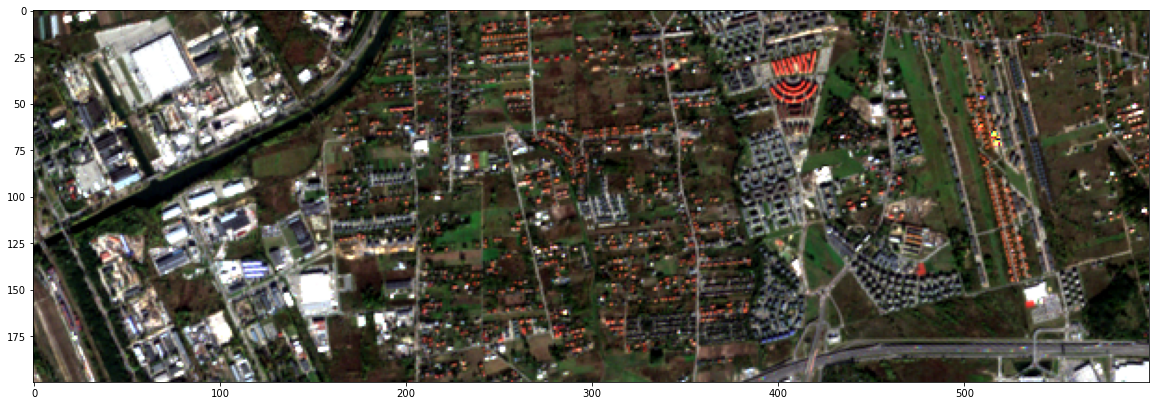

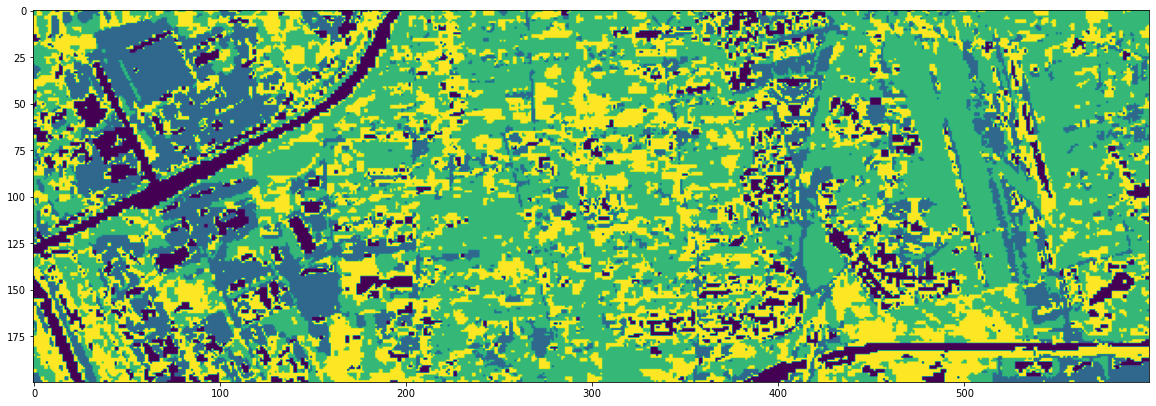

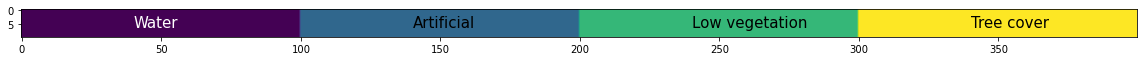

In [43]:
# original image
plt.figure(figsize=(20,10))
plt.imshow(im_comp)

# visualisation of results
plt.figure(figsize=(20,10))
plt.imshow(Y_class)

# legend
fig = plt.figure(figsize=(20,1))
ax = fig.add_subplot(111)
plt.imshow(np.hstack((np.zeros((10,100)), np.ones((10,100)),2*np.ones((10,100)),3*np.ones((10,100)))))
ax.text(40, 6, 'Water', fontsize=15,  color='white')
ax.text(140, 6, 'Artificial', fontsize=15,  color='black')
ax.text(240, 6, 'Low vegetation', fontsize=15,  color='black')
ax.text(340, 6, 'Tree cover', fontsize=15,  color='black')

In [52]:
# saving classification results
io.imsave(resFolder+'\classification_km.tif',Y_class)

## 5. Loading and displaying localisations of validation points

In [45]:
# loading localisation and LC classes of validation points
#
# validation points are stored in a file which contains lines consisting of triples of integer numbers Y, X and C 
# separated by line space:
# Y is a horizontal (row) pixel coordinate of a validation point
# X is a vertical (column) pixel coordinate of the point
# C is a land cover class index (0 for water, 1 for artificial surfaces, 2 for low vegetation and 3 for tree cover)

p_val = np.loadtxt(valPoints,dtype='int')



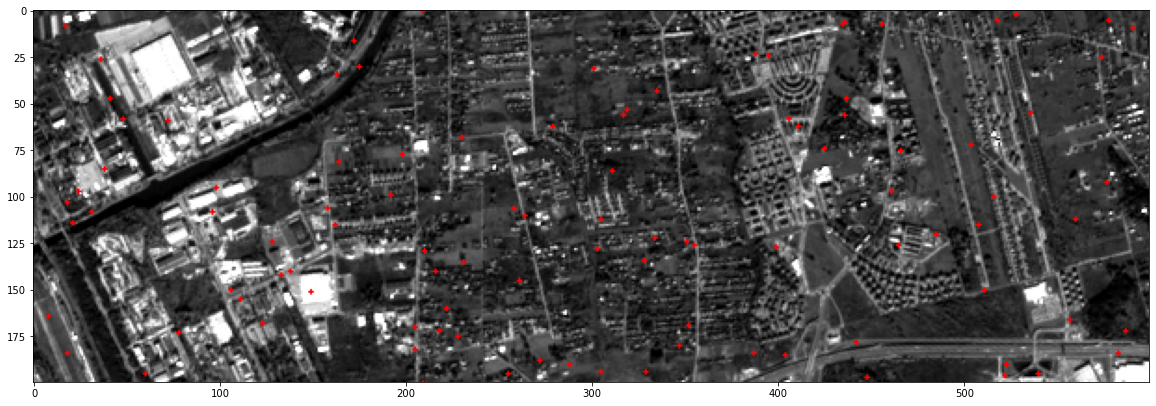

In [48]:
# displaying localisation of validation points on the S2 image
from skimage.color import rgb2gray

# converting the S2 composition to gray scale
im_comp_p=np.zeros(im_comp.shape)
im_comp_p[:,:,0]=rgb2gray(im_comp)
im_comp_p[:,:,1]=rgb2gray(im_comp)
im_comp_p[:,:,2]=rgb2gray(im_comp)

# marking in red the validation points
im_comp_p[p_val[:,0],p_val[:,1],0] =1
im_comp_p[p_val[:,0],p_val[:,1],1] =0
im_comp_p[p_val[:,0],p_val[:,1],2] =0
im_comp_p[p_val[:,0]+1,p_val[:,1],0] =1
im_comp_p[p_val[:,0]+1,p_val[:,1],1] =0
im_comp_p[p_val[:,0]+1,p_val[:,1],2] =0
im_comp_p[p_val[:,0]-1,p_val[:,1],0] =1
im_comp_p[p_val[:,0]-1,p_val[:,1],1] =0
im_comp_p[p_val[:,0]-1,p_val[:,1],2] =0
im_comp_p[p_val[:,0],p_val[:,1]+1,0] =1
im_comp_p[p_val[:,0],p_val[:,1]+1,1] =0
im_comp_p[p_val[:,0],p_val[:,1]+1,2] =0
im_comp_p[p_val[:,0],p_val[:,1]-1,0] =1
im_comp_p[p_val[:,0],p_val[:,1]-1,1] =0
im_comp_p[p_val[:,0],p_val[:,1]-1,2] =0

plt.figure(figsize=(20,10))
plt.imshow(im_comp_p)

## 6. Assesing classification performance using validation points

Overall accuracy for k-means: 56.00000000000001%


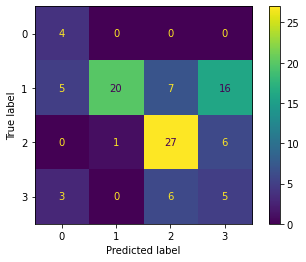

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# reading predictions for validation points from predicted image by different classifiers
pred_km = Y_class[p_val[:,0],p_val[:,1]] # k-means

# overall accuracy
ovAcc_km = accuracy_score(p_val[:,2],pred_km)
print("Overall accuracy for k-means: " + str(100*ovAcc_km) + "%")

# confusion matrix
confM_km = confusion_matrix(p_val[:,2],pred_km)

# visualisation of confusion matrix
disp = ConfusionMatrixDisplay(confM_km)
disp.plot()

